<a href="https://colab.research.google.com/github/amelliaaas/PraktikumML_282-305/blob/Kelas_mechine_learning/MLSkenario3_FIX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/My Drive/Radiography

/content/drive/My Drive/Radiography


In [ ]:
!ls

skenario_2  Skenario3  Skenario4


In [ ]:
# TULIS CODE ANDA DISINI
data_dir = "/content/drive/My Drive/Radiography/Skenario3"


In [ ]:
base_dir = "/content/drive/My Drive/Radiography/Skenario3"

In [ ]:
%cd /content/drive/My Drive/Radiography/Skenario3

/content/drive/My Drive/Radiography/Skenario3


In [ ]:
!ls

COVID  Normal  train  val


In [ ]:
pip install split-folders

In [ ]:
import splitfolders
splitfolders.ratio(data_dir, output=base_dir, seed=1337, ratio=(.7, .3))

Copying files: 438 files [00:03, 123.78 files/s]


In [ ]:
import os
base_dir ='/content/drive/My Drive/Radiography/Skenario3'

train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'val')

train_covid_dir = os.path.join(train_dir, 'COVID')
train_normal_dir = os.path.join(train_dir, 'Normal')

test_covid_dir = os.path.join(test_dir, 'COVID')
test_normal_dir = os.path.join(test_dir, 'Normal')



In [ ]:
ls

COVID/  Normal/  train/  val/


In [ ]:
#2. Menampilkan hasil jumlah pembagian
import os
import shutil

testcovid = "/content/drive/My Drive/Radiography/Skenario3/val/COVID"
testnormal = "/content/drive/My Drive/Radiography/Skenario3/val/Normal"
traincovid = "/content/drive/My Drive/Radiography/Skenario3/train/COVID"
trainnormal = "/content/drive/My Drive/Radiography/Skenario3/train/Normal"

test_c = os.listdir(testcovid)
test_n = os.listdir(testnormal)
train_c = os.listdir(traincovid)
train_n = os.listdir(trainnormal)

print ("Jumlah Train Covid :"+ str(len(train_c)))
print ("Jumlah Train Normal :"+ str(len(train_n)))
print ("Jumlah Test Covid :"+ str(len(test_c)))
print ("Jumlah Test Normal :"+ str(len(test_n)))

Jumlah Train Covid :153
Jumlah Train Normal :153
Jumlah Test Covid :66
Jumlah Test Normal :66


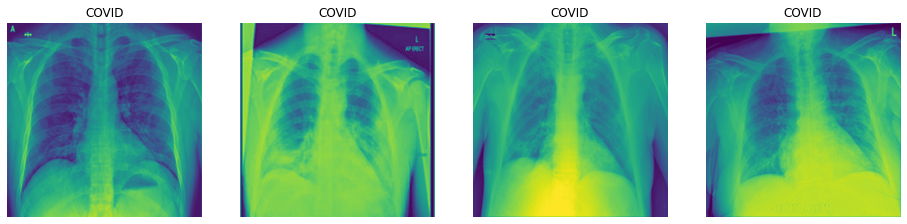

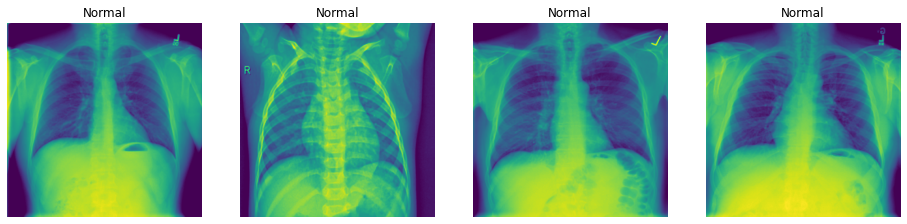

In [ ]:
#3.Menampilkan sample sebagian gambar dari kelas yang berbeda dengan ukuran 2 baris x 4 kolom

import matplotlib.pyplot as plt
import matplotlib.image as mping

traincovid_dir = os.path.join('/content/drive/My Drive/Radiography/Skenario3/train/COVID')
trainnormal_dir = os.path.join('/content/drive/My Drive/Radiography/Skenario3/train/Normal') 

covid_image = os.listdir(traincovid_dir)
normal_image = os.listdir(trainnormal_dir)

fname1 = [os.path.join(traincovid_dir,fname)
        for fname in covid_image[1:5]]

fname2 = [os.path.join(trainnormal_dir,fname)
        for fname in normal_image[1:5]]

ncolu = 4
nrow = 2
fig = plt.gcf()
fig.set_size_inches(ncolu*4,nrow*4)
for i,fname in enumerate(fname1):
    sp = plt.subplot(2,4,i+1)
    sp.axis('off')
    img = mping.imread(fname)
    plt.title('COVID')
    plt.imshow(img)
plt.show()

ncolu = 4
nrow = 2
fig = plt.gcf()
fig.set_size_inches(ncolu*4,nrow*4)
for i,fname in enumerate(fname2):
    sp = plt.subplot(2,4,i+1)
    sp.axis('off')
    img = mping.imread(fname)
    plt.title('Normal')
    plt.imshow(img)
    
plt.show()

In [ ]:
# 1. Gather data training dan testing dengan ukuran gambar 150x150

import os 
import cv2
import numpy as np

# gather data train
train_data = []
train_label = []

train_dir = os.path.join('/content/drive/My Drive/Radiography/Skenario3/train')
for r, d, f in os.walk(train_dir):
  for file in f :
    if ".png" in file :
      imagepath = os.path.join(r, file)
      image = cv2.imread(imagepath)
      image = cv2.resize(image, (150,150))
      train_data.append(image)
      label = imagepath.split(os.path.sep)[-2]
      train_label.append(label)

train_data = np.array(train_data)
train_label = np.array(train_label)

# gather data testing
val_data = []
val_label = []

test_dir = os.path.join('/content/drive/My Drive/Radiography/Skenario3/val')
for r, d, f in os.walk(test_dir):
  for file in f :
    if ".png" in file :
      imagepath = os.path.join(r, file)
      image = cv2.imread(imagepath)
      image = cv2.resize(image, (150,150))
      val_data.append(image)
      label = imagepath.split(os.path.sep)[-2]
      val_label.append(label)

val_data = np.array(val_data)
val_label = np.array(val_label)

In [ ]:
#shape dari data train dan data validation
print("Train Data = ", train_data.shape)
print("Train Label = ", train_label.shape)
print("Validation Data = ", val_data.shape)
print("Validation Label = ", val_label.shape)

Train Data =  (306, 150, 150, 3)
Train Label =  (306,)
Validation Data =  (132, 150, 150, 3)
Validation Label =  (132,)


In [ ]:

#2. Normalisasi dataset
print("Data sebelum di-normalisasi : ", train_data[0][0][0])

x_train = train_data.astype('float32') / 255.0
x_val = val_data.astype('float32') / 255.0

print("Data sesudah di-normalisasi : ", x_train[0][0][0])

Data sebelum di-normalisasi :  [9 9 9]
Data sesudah di-normalisasi :  [0.03529412 0.03529412 0.03529412]


In [ ]:
#3. Membuat Label Encoder
from sklearn.preprocessing import LabelEncoder

print("Label sebelum di-encoder ", train_label[1:15])

lb = LabelEncoder()
y_train = lb.fit_transform(train_label)
y_val = lb.fit_transform(val_label)

print("Label setelah di-encoder ", y_train[1:15])

Label sebelum di-encoder  ['Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal'
 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal']
Label setelah di-encoder  [1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [ ]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import InputLayer, Dense, Conv2D, MaxPool2D, Flatten, BatchNormalization, Dropout

In [ ]:
# Feature Extraction Layer
model3 = Sequential()

model3.add(InputLayer(input_shape=[150,150,3]))
model3.add(Conv2D(filters=16, kernel_size=3, strides=1, padding='same', activation='relu'))
model3.add(BatchNormalization())
model3.add(MaxPool2D(pool_size=2, padding='same'))
model3.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu'))
model3.add(BatchNormalization())
model3.add(MaxPool2D(pool_size=2, padding='same'))
model3.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
model3.add(BatchNormalization())
model3.add(MaxPool2D(pool_size=2, padding='same'))
model3.add(Dropout(0.3))
model3.add(Flatten())

# Fully Connected Layer
model3.add(Dense(128, activation='relu'))
model3.add(Dropout(0.5))
model3.add(Dense(1, activation='sigmoid'))

# Compile model
from tensorflow.keras.optimizers import SGD

model3.compile(optimizer=SGD(lr=0.001, decay=0.001/20), # decay = learning_rate / batch_size 
              loss='binary_crossentropy', 
              metrics=['acc'])

H3 = model3.fit(x_train, y_train, batch_size=20, epochs=100, validation_data=(x_val, y_val))

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/100
16/16 [==============================] - 4s 43ms/step - loss: 0.7276 - acc: 0.7026 - val_loss: 0.6786 - val_acc: 0.5000
Epoch 2/100
16/16 [==============================] - 0s 16ms/step - loss: 0.4202 - acc: 0.7941 - val_loss: 0.6835 - val_acc: 0.5000
Epoch 3/100
16/16 [==============================] - 0s 16ms/step - loss: 0.3951 - acc: 0.8170 - val_loss: 0.6774 - val_acc: 0.5076
Epoch 4/100
16/16 [==============================] - 0s 16ms/step - loss: 0.3274 - acc: 0.8627 - val_loss: 0.6815 - val_acc: 0.5000
Epoch 5/100
16/16 [==============================] - 0s 16ms/step - loss: 0.2897 - acc: 0.8856 - val_loss: 0.6735 - val_acc: 0.5227
Epoch 6/100
16/16 [==============================] - 0s 15ms/step - loss: 0.2658 - acc: 0.9085 - val_loss: 0.6687 - val_acc: 0.5379
Epoch 7/100
16/16 [==============================] - 0s 15ms/step - loss: 0.2417 - acc: 0.9118 - val_loss: 0.6539 - val_acc: 0.5909
Epoch 8/100
16/16 [==============================] - 0s 15ms/step - loss: 0.

In [ ]:
model.save('model_skenario1_3.h5')

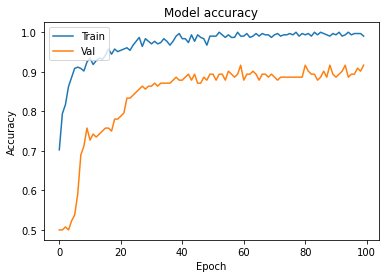

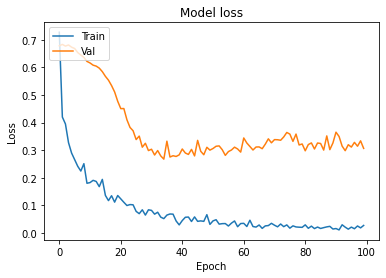

In [ ]:
# plot training and validation accuracy values
plt.plot(H3.history['acc'])
plt.plot(H3.history['val_acc'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Val'], loc = 'upper left')
plt.show()

# plot training and validation loss values
plt.plot(H3.history['loss'])
plt.plot(H3.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Val'], loc = 'upper left')
plt.show()

In [ ]:
# 3. Klasifikasi report dari Model 1

from sklearn.metrics import classification_report

pred = model3.predict(x_val)
labels = (pred > 0.5).astype(np.int)

print(classification_report(y_val, labels))


              precision    recall  f1-score   support

           0       0.92      0.91      0.92        66
           1       0.91      0.92      0.92        66

    accuracy                           0.92       132
   macro avg       0.92      0.92      0.92       132
weighted avg       0.92      0.92      0.92       132



In [ ]:
# find the accuracy on train and test set
train_loss, train_acc = model3.evaluate(x_train, y_train)
val_loss, val_acc = model3.evaluate(x_val, y_val)
print("Accuracy on train set is %f" %(train_acc * 100)  + "%")
print("Accuracy on validation set is %f" %(val_acc * 100)  + "%")

5/5 [==============================] - 0s 8ms/step - loss: 0.3066 - acc: 0.9167
Accuracy on train set is 100.000000%
Accuracy on validation set is 91.666669%


In [ ]:

!pip install pyyaml h5py
model_json = model.to_json()
with open("model2.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model2_1.hdf5")
print("Saved model to disk")

Saved model to disk


In [ ]:
ls

model1.hdf5  model2.json  model_skenario1_1.h5  train/
model2.hdf5  model.json   model_skenario1.h5    val/


### **SOAL 2 :**

---
Untuk mendapatkan penilaian pada soal ke 2 ini anda **wajib** mengerjakan soal nomer 1 terlebih dahulu. Tunjukkan kepada asisten bahwa anda telah menyelesaikan seluruh soal wajib diatas dan jelaskan dengan sebaik mungkin kepada asisten.


**Poin penilaian**
* Dapat menunjukkan dan menjelaskan hasil evaluasi masing-masing model yang digunakan.
* Dapat memvisualisasikan hasil evaluasi model dan menjelaskannya kepada asisten. 
* Menggunakan maptplotlib atau seaborn untuk visualisasi loss dan accuracy
* Menampilkan hasil evaluasi berupa nilai presisi, akurasi, recall, f1 score dan confusion matrix.
* Menggunakan tensorboard untuk visualisasi hasil evaluasi model menggunakan hyperparameter tuning.
* Menggunakan Hparam untuk tuning model.
* Hasil accuracy model terbaik >= 80% 
* Hasil loss model terbaik < 5%

## Kegiatan 2 **(berkelompok)**
30 poin

**Ketentuan Wajib**
* Tulis dokumentasi tugas kelompok anda dalam file README.md
* Cek daftar dataset seluruh praktikan [disini](https://docs.google.com/spreadsheets/d/1qyu5AVDhPhegpRTbNaDoq5qXX4_CX09Q7tYyD-fkF_c/edit?usp=sharing)
* Seluruh data dan progress pengerjaan tugas kelompok harus berada dalam github repository sebelum praktikum dimulai
* Tidak diperbolehkan berganti anggota kelompok selama satu semester ini
* Tidak diperbolehkan berganti repository selama mengerjakan tugas kelompok ini
* **Tidak diperbolehkan berganti dataset atau jurnal rujukan**
* Pastikan anda menggunakan akun github pribadi untuk melakukan commit dan push

**Penilaian**
* Keaktifan dalam tim
* Kontribusi dalam proyek dan tim
* Penerapan prinsip kerja Agile (sprint backlog dan report terdokumentasikan dengan baik)
* Progress pengerjaan tugas kelompok
* Problem solving masing - masing anggota terhadap kendala yang dialami
* Pemahaman masing - masing anggota tim terhadap tugas yang dikerjakan
* Pendokumentasian proyek "clear and clean documentation"

**Materi pendukung**
* [Project documentation](https://realpython.com/documenting-python-code)
* [Github readme](https://docs.github.com/en/github/writing-on-github/getting-started-with-writing-and-formatting-on-github/basic-writing-and-formatting-syntax)
* [Sprint backlog](https://www.lucidchart.com/blog/how-to-develop-a-product-backlog-in-agile)

**Tugas**

Melanjutkan tugas kelompok di modul 1 sampai 3 sekarang kerjakan beberapa poin berikut untuk didemokan kepada asisten masing-masing.

*   Melakukan proses preprocessing dataset dengan ketentuan:
 * augmentasi data menggunakan ImageDataGenerator
 * balancing dataset menggunakan teknik oversampling / downsampling
 * splitting dataset menjadi (75% train, 14% validation, 1% test)
*   Melakukan training beberapa skema model menggunakan model CNN sederhana buatan sendiri **(minimal 2 model)** *tidak diperbolehkan menggunakan transfer learning* 
 * Menerapkan proses Convolution
 * Menerapkan proses Pooling
 * Menerapkan Dropout
 * Menerpakan BatchNormalization
 * Menerapkan learning rate scheduller
 * Menggunakan hyperparameter tuning
 * Minimal 100 epoch per model
* Menyimpan model yang telah di training kedalam file `.json` dan weight kedalam file `.h5` [Lihat disini](https://www.tensorflow.org/guide/keras/save_and_serialize)
*  Mencatat hasil perkembangan tugas kelompok dalam file `sprint_project.xlsx` tandai masing-masing task dengan status **Done** *untuk task yang telah selesai dikerjakan*, **On Going** *untuk task yang dalam proses pengerjaan*, **Waiting** *untuk task yang belum atau akan dikerjakan*
* Pastikan anda menulis tanggal mulai dan tanggal selesai masing-masing task dengan benar
* Pastikan anda menulis penanggung jawab masing-masing task (Penanggung jawab bertugas menyelesaikan dan menuntaskan masing-masing task yang diberikan)
* `commit` dan `push` seluruh perkerjaan yang anda lakukan kedalam branch pribadi dalam repository tugas kelompok yang telah anda buat sebelumnya.
* Presentasikan kepada asisten tentang apa yang anda lakukakan selama mengerjakan tugas kelompok ini. Ceritakan tentang tugas masing-masing anggota,  kendala dalam mengerjakan tugas sampai solusi yang anda lakukan saat mengerjakan tugas kelompok ini.

